In [2]:
import pandas as pd
from sklearn.model_selection import ShuffleSplit, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree

In [3]:
FILES_PATH = "../data/"

In [4]:
dataset_2_25 = pd.read_excel(FILES_PATH + "Dataset2_25%.xlsx")
dataset_2_50 = pd.read_excel(FILES_PATH + "Dataset2_50%.xlsx")
dataset_2_75 = pd.read_excel(FILES_PATH + "Dataset2_75%.xlsx")
dataset_2_100 = pd.read_excel(FILES_PATH + "Dataset2_100%.xlsx")

In [5]:
all_data = {
    "25%" : dataset_2_25,
    "50%" : dataset_2_50,
    "75%" : dataset_2_75,
    "100%" : dataset_2_100
}

In [7]:
all_features_2 = ["assign_view", "assign_submit", "quiz_attempt", "quiz_submit"
                ,"quiz_view", "forum_part", "forum_view", "resource_view",
                "folder_view", "url_view", "AM+", "AM-", "PM+", "PM-", "TDS", "TDA", "ADS"]

In [8]:
features_selected = ["assign_view", "assign_submit", "quiz_attempt", "quiz_submit"
                    ,"quiz_view","PM+", "PM-", "TDS", "TDA", "ADS"]

In [13]:
final_result = pd.DataFrame(columns=["accuracy", "precision", "recall", "f1"])

for dataset in all_data.keys():
    evaluation = pd.DataFrame(columns=["accuracy", "precision", "recall", "f1"])
    #80% para entrenamiento y 20% para evaluación
    train_set = all_data[dataset].iloc[:2308]
    test_set  = all_data[dataset].iloc[2308:]

    #preparando la validacion cruzada
    y = train_set.copy().pop("status")
    X = train_set.copy().values
    ss = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    Kfold = {}
    for i, (train_index, test_index) in enumerate(ss.split(X)):
        Kfold[i] = {
            "train" : train_index,
            "test" : test_index
        }

    for i in Kfold.keys():
        train = train_set.iloc[Kfold[i]["train"]]
        test = train_set.iloc[Kfold[i]["test"]]
        model = tree.DecisionTreeClassifier(max_depth=4, criterion="entropy")
        model.fit(train[all_features_2], train["status"])
        pred = model.predict(test[all_features_2])
        accuracy = accuracy_score(test["status"], pred)
        precision = precision_score(test["status"], pred)
        recall = recall_score(test["status"],pred)
        f1 = f1_score(test["status"],pred)
        evaluation = pd.concat([evaluation, pd.DataFrame({"accuracy" : accuracy, 
                                                            "precision" : precision, 
                                                            "recall": recall, 
                                                            "f1": f1}, index = [0])], ignore_index=True)

    final_result = pd.concat([final_result, pd.DataFrame({
        "accuracy" : evaluation["accuracy"].mean(),
        "precision" : evaluation["precision"].mean(),
        "recall" : evaluation["recall"].mean(),
        "f1" : evaluation["f1"].mean()
    }, index = [0])], ignore_index =True)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

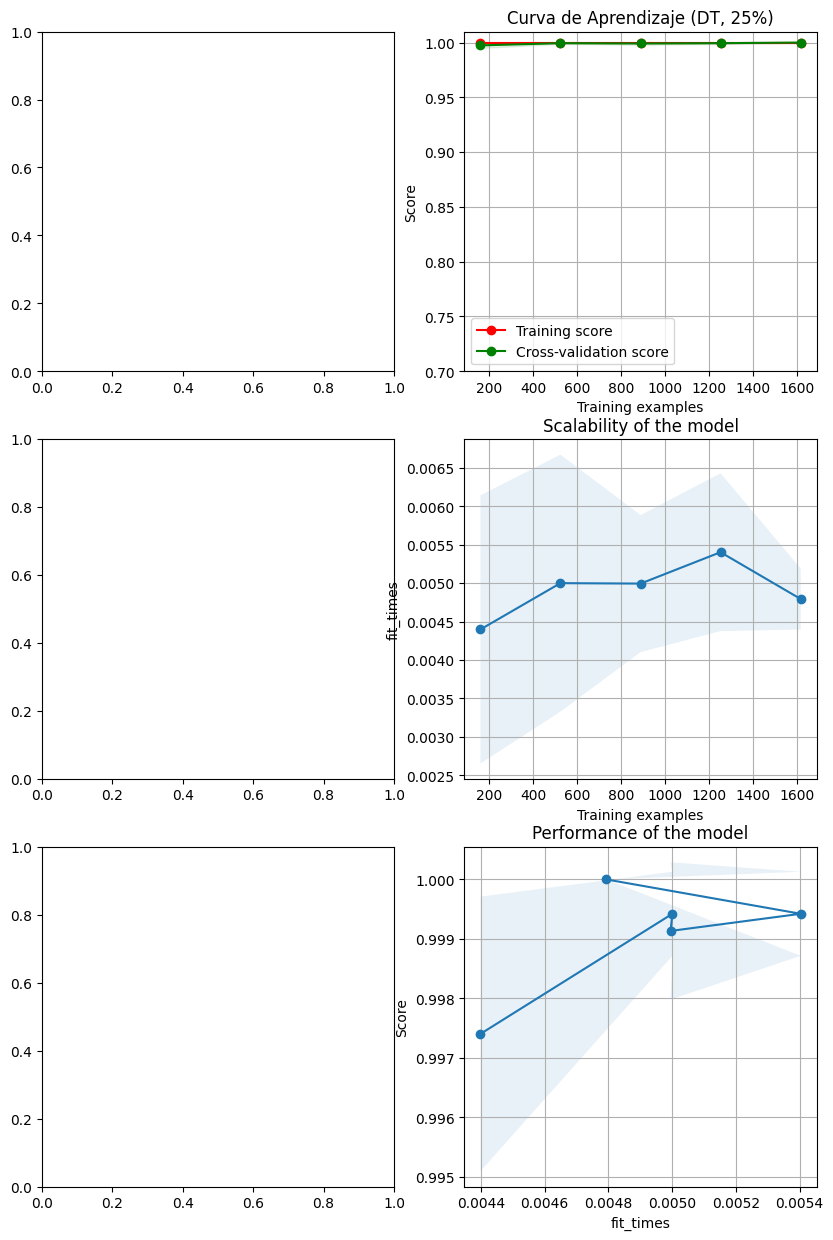

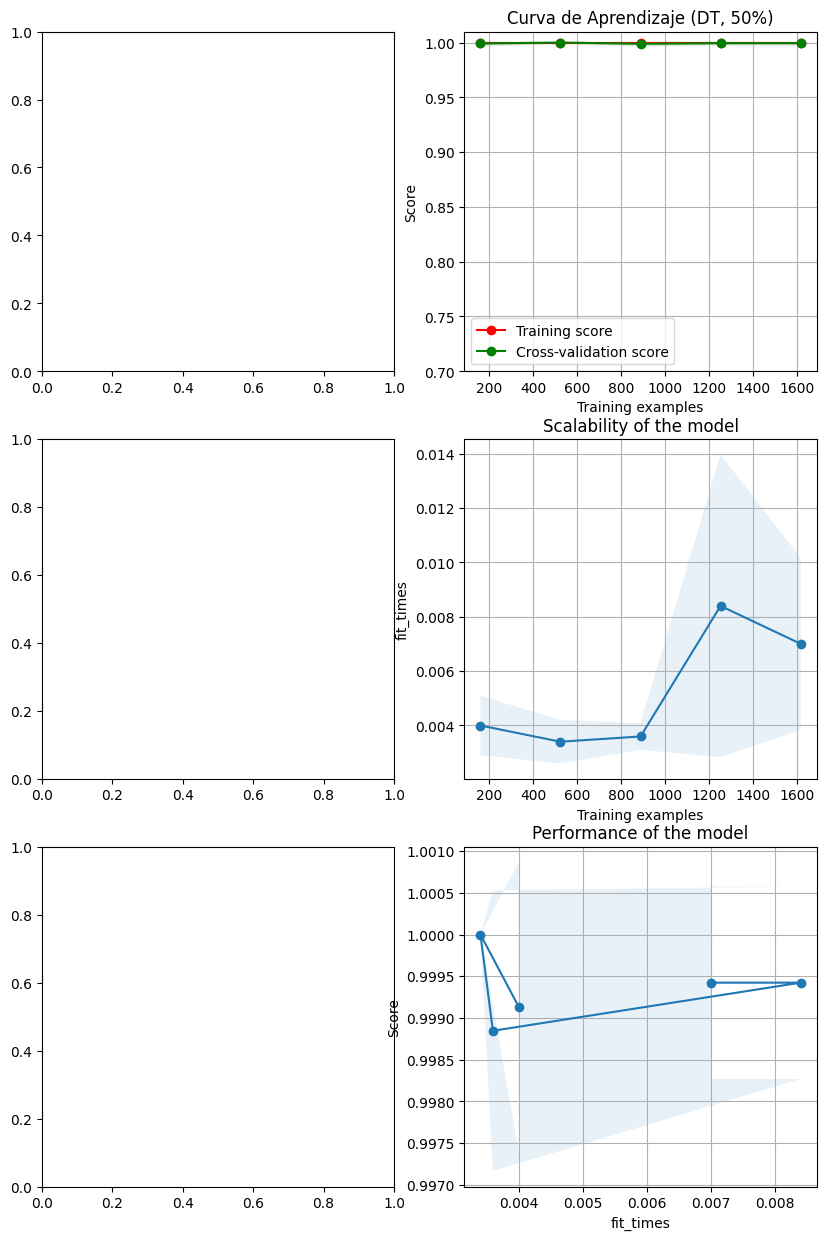

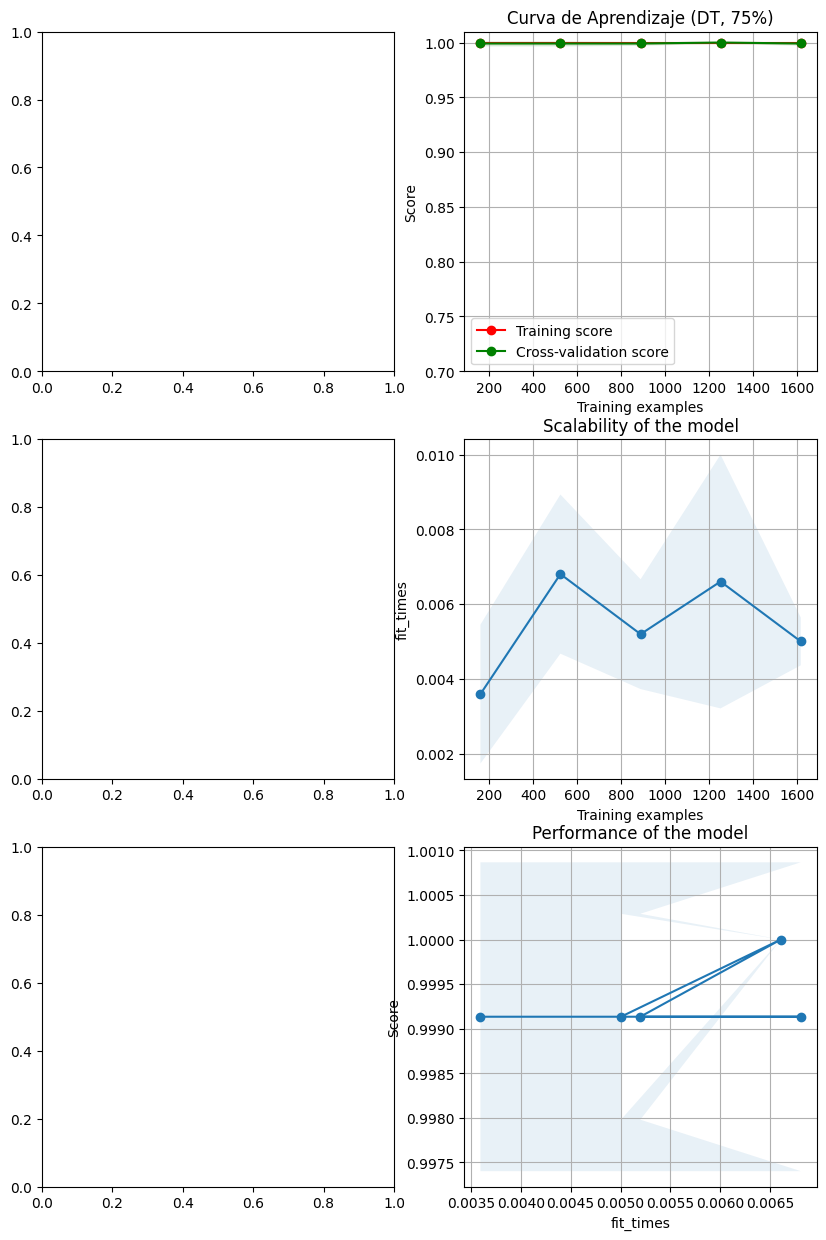

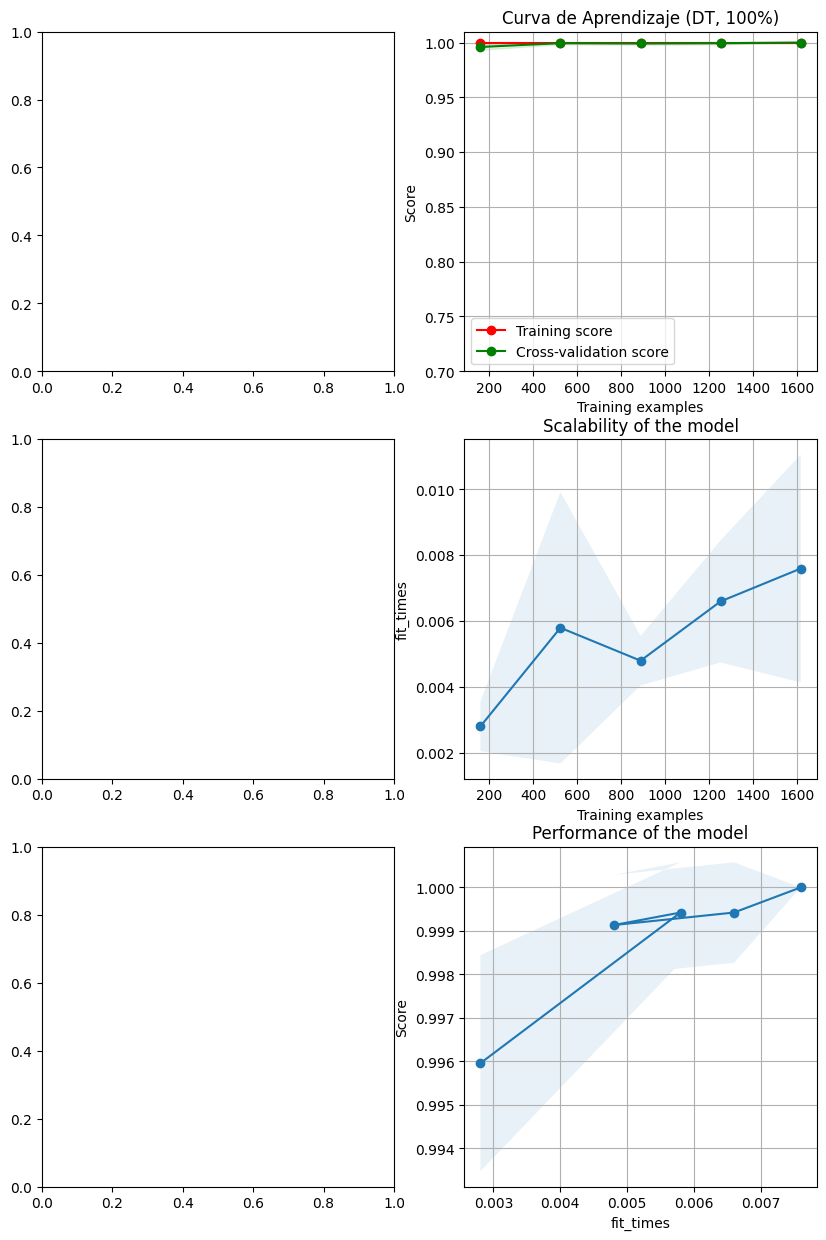

In [7]:
final_result = pd.DataFrame(columns=["accuracy", "precision", "recall", "f1"])
scoring = ["accuracy", "precision", "recall", "f1"]
for dataset in all_data.keys():
    evaluation = pd.DataFrame(columns=["accuracy", "precision", "recall", "f1"])
    #80% para entrenamiento y 20% para evaluación
    train_set = all_data[dataset].iloc[:2308]
    test_set  = all_data[dataset].iloc[2308:]

    #preparando la validacion cruzada
    y = train_set.copy().pop("status")
    X = train_set.copy().values
    ss = ShuffleSplit(n_splits=5, test_size=0.30, random_state=0)
    model = tree.DecisionTreeClassifier(max_depth=4, criterion="entropy")
    scores = cross_validate(model, X,  y, scoring=scoring, )
    final_result = pd.concat([final_result, pd.DataFrame({
        "accuracy" : scores["test_accuracy"].mean(),
        "precision" : scores["test_precision"].mean(),
        "recall" : scores["test_recall"].mean(),
        "f1" : scores["test_f1"].mean()
    }, index = [0])], ignore_index =True)
    
    fig, axes = plt.subplots(3, 2, figsize=(10, 15))
    plot_learning_curve(model, f"Curva de Aprendizaje (DT, {dataset})", X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=ss, n_jobs=4)

In [8]:
final_result.index = all_data.keys()

In [9]:
final_result

,accuracy,precision,recall,f1
25%,1.000000,1.0,1.000000,1.000000
50%,1.000000,1.0,1.000000,1.000000
75%,1.000000,1.0,1.000000,1.000000
100%,0.999567,1.0,0.999464,0.999732


In [16]:
final_result.to_json(FILES_PATH + "DT_METRICAS_2.json")